# phageParser - Analysis of Locus Size Distribution

C.K. Yildirim (cemyildirim@fastmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) demo is available at [http://github.com/phageParser/phageParser](https://github.com/phageParser/phageParser/tree/django-dev/demos)

## Introduction

This demo uses the REST API of phageParser running locally to plot the distribution of number of spacers for a locus.
In this case, the API is consumed using the requests library and the json responses are parsed for gathering
number of spacers for each locus.

In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

In [2]:
#Url of the phageParser API
apiurl = 'http://127.0.0.1:8000'

In [3]:
#Get the initial page for listing of accessible objects and get url for spacers
r=requests.get(apiurl)
locusurl = r.json()['loci']

In [4]:
#API is accessible by chunks of spacers that are in each page, get the total number of pages from meta field
r=requests.get(locusurl)
last_page = r.json()['meta']['total_pages']

In [5]:
#Iterate through each page and store json response which only has number of spacers information
jbatches = []
for page in range(1,last_page):
    #Exclude every field on spacer object other than length and move to a certain page
    batch_url = locusurl+'?page={}&exclude[]=*&include[]=spacerrepeats'.format(page)
    spacer_batch = requests.get(batch_url).json()
    jbatches.append(spacer_batch)

In [14]:
#Get the length attribute of each spacer in each list in json response and store in a numpy array
locusspacersize = np.array([len(loc['spacerrepeats']) for locus_batch in jbatches for loc in locus_batch['locus']])

In [15]:
#Calculate the mean and standard deviation for spacer basepair lengths
mu, sigma = locusspacersize.mean(), locusspacersize.std()
print("Calculated mean basepair length for spacers is {:.2f}+/-{:.2f}".format(mu,sigma))

Calculated mean basepair length for spacers is 18.52+/-27.73


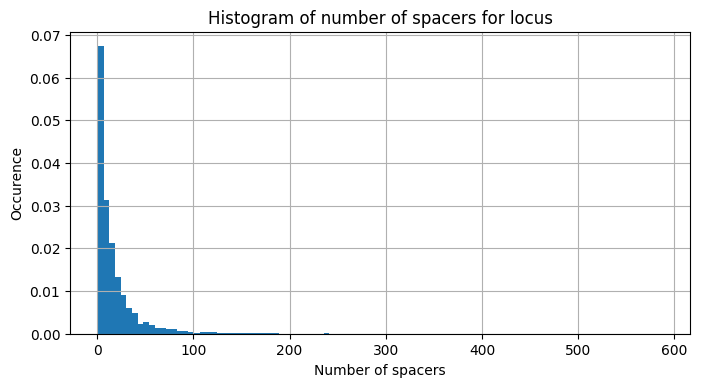

In [22]:
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
bins=100
#Plot histogram of spacer length frequency
ax.hist(locusspacersize,bins=bins, normed=1)


#format the figure and label
ax.grid(True)
ax.set_title("Histogram of number of spacers for locus")
ax.set_xlabel("Number of spacers")
ax.set_ylabel("Occurence")
plt.show()

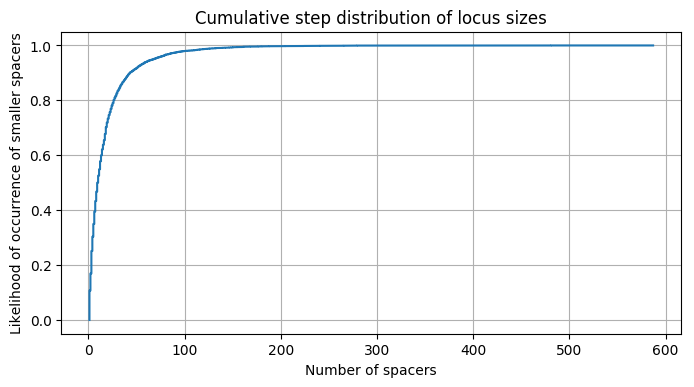

In [23]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
#Plot cumulative probability of data
sorted_data = np.sort(locusspacersize)
ax.step(sorted_data, np.arange(sorted_data.size)/sorted_data.size, label='Empirical')

#Format the figure and label
ax.grid(True)
ax.set_title('Cumulative step distribution of locus sizes')
ax.set_xlabel("Number of spacers")
ax.set_ylabel('Likelihood of occurrence of smaller spacers')
plt.show()